# PCA 理论加代码

In [1]:
import pandas as pd

In [2]:
# Eating, exercise habbit and their body shape
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

In [4]:
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [5]:
df.head(10)

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


In [6]:
# X is feature vectors
X = df[['calory', 'breakfast', 'lunch', 'dinner', 'exercise']]

In [7]:
X.head(9)

,calory,breakfast,lunch,dinner,exercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3
4,5000,2,2,2,0
5,1300,0,0,1,2
6,3000,1,0,1,1
7,4000,2,2,2,0
8,2600,0,2,0,0


In [8]:
# Y is labels
Y = df[['body_shape']]
Y.head(10)

,body_shape
0,Skinny
1,Normal
2,Fat
3,Skinny
4,Fat
5,Skinny
6,Normal
7,Fat
8,Normal
9,Fat


In [9]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)

In [10]:
x_std

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

In [11]:
import numpy as np
# features are columns from x_std
features = x_std.T 
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.71721914]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.76471911]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.76471911 -0.63492063  1.11111111]]


In [12]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
print('Eigenvectors \n%s' %eig_vecs)

Eigenvectors 
[[ 0.508005    0.0169937  -0.84711404  0.11637853  0.10244985]
 [ 0.44660335  0.36890361  0.12808055 -0.63112016 -0.49973822]
 [ 0.38377913 -0.70804084  0.20681005 -0.40305226  0.38232213]
 [ 0.42845209  0.53194699  0.3694462   0.22228235  0.58954327]
 [-0.46002038  0.2816592  -0.29450345 -0.61341895  0.49601841]]


In [13]:
print('\nEigenvalues \n%s' %eig_vals)


Eigenvalues 
[4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]


In [14]:
# We reduce dimension to 1 dimension, since 1 eigenvector has 73% (enough) variances
eig_vals[0] / sum(eig_vals)

0.7318321731427544

In [16]:

projected_X  = x_std.dot(eig_vecs.T[0])
projected_X
result = pd.DataFrame(projected_X, columns=['PC1'])
result['y-axis'] = 0.0
result['label'] = Y

In [17]:
result.head(10)

,PC1,y-axis,label
0,-2.226009,0.0,Skinny
1,-0.018143,0.0,Normal
2,1.762966,0.0,Fat
3,-2.735424,0.0,Skinny
4,3.027115,0.0,Fat
5,-2.147026,0.0,Skinny
6,-0.371425,0.0,Normal
7,2.592399,0.0,Fat
8,-0.393478,0.0,Normal
9,0.509025,0.0,Fat


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,1,'PCA result')

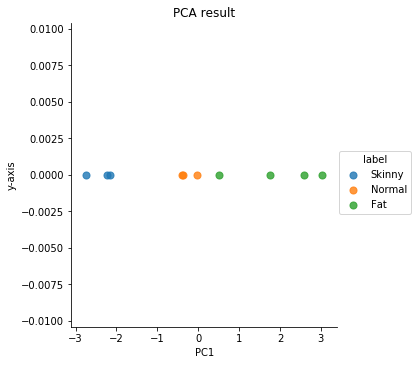

In [19]:
sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color

# title
plt.title('PCA result')

In [5]:
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片
import numpy as np
from PIL import Image

In [6]:



image=mpimg.imread('0.jpg')
image.shape
image

array([[105, 108, 109, ..., 172, 156, 136],
       [102, 106, 108, ..., 178, 167, 151],
       [ 99, 103, 107, ..., 180, 173, 163],
       ..., 
       [ 22,  22,  21, ...,  79,  80,  80],
       [ 20,  20,  21, ...,  75,  77,  78],
       [ 19,  20,  21, ...,  70,  73,  76]], dtype=uint8)

C:\Users\Magneto_Wang\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


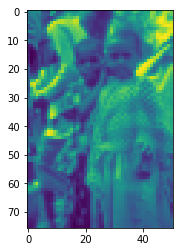

(76, 51)

In [7]:
from scipy import misc
image = misc.imresize(image, 0.2)
#image = scipy.skimage.transform.resize(image, 0.2)
plt.imshow(image)
#plt.axis('off')
plt.show()
image.shape

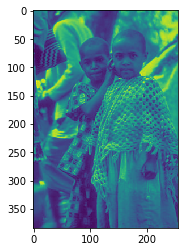

In [97]:
plt.imshow(image)
#plt.axis('off')
plt.show()

In [98]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)
pca.fit(image)
image = pca.transform(image)


In [99]:
approximation = pca.inverse_transform(image)

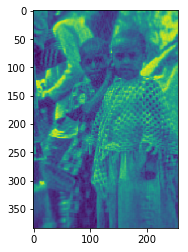

In [100]:
plt.imshow(approximation)
#plt.axis('off')
plt.show()

In [17]:

image.shape
# adjust width and height to your needs
width = 75
height = 50

# use one of these filter options to resize the image
#im2 = image.resize((width, height),Image.)      # use nearest neighbour
im3 = image.resize((width, height), Image.BILINEAR)     # linear interpolation in a 2x2 environment
im4 = image.resize((width, height), Image.BICUBIC)      # cubic spline interpolation in a 4x4 environment
im5 = image.resize((width, height), Image.ANTIALIAS)    # best down-sizing filter



TypeError: 'tuple' object cannot be interpreted as an integer

In [8]:
image.shape[1]
image.shape[0]
print(image.shape)

(76, 51)


In [125]:
def image2vector (image):
    returnVect=np.zeros((1,image.shape[0]*image.shape[1]))
    print(returnVect.shape)
    for i in range (image.shape[0]):
        for j in range (image.shape[1]):
            #print(str(i)+" "+str(j)+"  = "+str(256*i+j))
            returnVect[0,image.shape[1]*i+j]=image[i][j]
    return returnVect

vect = image2vector(image)
vect.shape

(1, 3876)


(1, 3876)

In [9]:
vect=image

In [10]:
from  sklearn.preprocessing   import StandardScaler
vect = StandardScaler().fit_transform(vect)

C:\Users\Magneto_Wang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
vect

array([[ 1.5346306 ,  1.04285007,  0.8211889 , ...,  1.64796823,
         1.5250285 ,  1.36308083],
       [ 1.03897351,  0.86733718,  0.72879755, ...,  1.53951171,
         0.9548683 ,  1.25278042],
       [ 0.65769883,  0.54138467,  0.65950404, ...,  1.60458562,
         0.6811914 ,  0.76745863],
       ..., 
       [-1.24867459, -0.98808477, -1.00354025, ..., -1.06344469,
        -1.07490203, -0.84292733],
       [-1.43931193, -1.08837784, -1.07283376, ..., -1.1285186 ,
        -1.18893407, -0.79880716],
       [-1.5918218 , -1.16359765, -0.98044241, ..., -1.21528381,
        -1.25735329, -0.88704749]])

In [12]:
vect.T.shape

(51, 76)

In [13]:
vect

array([[ 1.5346306 ,  1.04285007,  0.8211889 , ...,  1.64796823,
         1.5250285 ,  1.36308083],
       [ 1.03897351,  0.86733718,  0.72879755, ...,  1.53951171,
         0.9548683 ,  1.25278042],
       [ 0.65769883,  0.54138467,  0.65950404, ...,  1.60458562,
         0.6811914 ,  0.76745863],
       ..., 
       [-1.24867459, -0.98808477, -1.00354025, ..., -1.06344469,
        -1.07490203, -0.84292733],
       [-1.43931193, -1.08837784, -1.07283376, ..., -1.1285186 ,
        -1.18893407, -0.79880716],
       [-1.5918218 , -1.16359765, -0.98044241, ..., -1.21528381,
        -1.25735329, -0.88704749]])

In [126]:
features = vect.T
print(features.shape)
features.T.shape
print(features.shape)
print(features)

(3876, 1)
(3876, 1)
[[ 104.]
 [ 110.]
 [ 112.]
 ..., 
 [  67.]
 [  67.]
 [  74.]]


In [129]:
print(features)

[[ 104.]
 [ 110.]
 [ 112.]
 ..., 
 [  67.]
 [  67.]
 [  74.]]


In [132]:
def compute_pca(data):
    m = np.mean(data, axis=0)
    datac = np.array([obs - m for obs in data])
    T = np.dot(datac, datac.T)
    [u,s,v] = np.linalg.svd(T)

    # here iteration is over rows but the columns are the eigenvectors of T
    pcs = [np.dot(datac.T, item) for item in u.T ]

    # note that the eigenvectors are not normed after multiplication by T^T
    pcs = np.array([d / np.linalg.norm(d) for d in pcs])

    return pcs, m, s, T, u

def compute_projections(I,pcs,m):
    projections = []
    for i in I:
        w = []
        for p in pcs:
            w.append(np.dot(i - m, p))
        projections.append(w)
    return projections

def reconstruct(w, X, m,dim = 5):
    return np.dot(w[:dim],X[:dim,:]) + m

def normalize(samples, maxs = None):
    # Normalize data to [0,1] intervals. Supply the scale factor or
    # compute the maximum value among all the samples.

    if not maxs:
        maxs = np.max(samples)
    return np.array([np.ravel(s) / maxs for s in samples])


pcs, m, s, T, u=compute_pca(features)


C:\Users\Magneto_Wang\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


(array([[-1.],
        [-1.],
        [ 1.],
        ..., 
        [-1.],
        [ 1.],
        [ 1.]]),
 array([ 96.56398349]),
 array([  6.96200713e+06,   3.09616691e-08,   3.07213908e-08, ...,
          6.95641493e-10,   4.87112376e-10,   4.25259045e-12]),
 array([[  55.29434156,   99.91044064,  114.78247366, ..., -219.83826937,
         -219.83826937, -167.78615379],
        [  99.91044064,  180.52653971,  207.39857273, ..., -397.2221703 ,
         -397.2221703 , -303.17005472],
        [ 114.78247366,  207.39857273,  238.27060575, ..., -456.35013728,
         -456.35013728, -348.2980217 ],
        ..., 
        [-219.83826937, -397.2221703 , -456.35013728, ...,  874.02911969,
          874.02911969,  667.08123527],
        [-219.83826937, -397.2221703 , -456.35013728, ...,  874.02911969,
          874.02911969,  667.08123527],
        [-167.78615379, -303.17005472, -348.2980217 , ...,  667.08123527,
          667.08123527,  509.13335085]]),
 array([[ -2.81820846e-03,   2.10599079

In [14]:
features=vect
features.shape

(76, 51)

In [15]:
import scipy
print(features.shape)
covariance_matrix = np.cov(features)
print(covariance_matrix.shape)
print(covariance_matrix)

(76, 51)
(76, 76)
[[ 1.26494084  1.0060072   0.85316509 ..., -0.20061553 -0.15220018
  -0.11653982]
 [ 1.0060072   0.93874882  0.90671539 ..., -0.15776189 -0.12210021
  -0.11765035]
 [ 0.85316509  0.90671539  1.17065554 ..., -0.14563388 -0.13969384
  -0.15482761]
 ..., 
 [-0.20061553 -0.15776189 -0.14563388 ...,  0.19103431  0.1759156
   0.17200857]
 [-0.15220018 -0.12210021 -0.13969384 ...,  0.1759156   0.22928731
   0.2487608 ]
 [-0.11653982 -0.11765035 -0.15482761 ...,  0.17200857  0.2487608
   0.30854793]]


In [16]:
T = np.dot(features, features.T)
[u,s,v] = np.linalg.svd(T)

In [17]:
pcs = [np.dot(features.T, item) for item in u.T ]
pcs = np.array([d / np.linalg.norm(d) for d in pcs])
pcs

array([[-0.08196432, -0.09511125, -0.07418997, ..., -0.21770061,
        -0.21489946, -0.21236512],
       [-0.11506653, -0.18993919, -0.18986805, ..., -0.0387595 ,
        -0.03983901, -0.04426417],
       [-0.10630765, -0.15062371, -0.15683404, ...,  0.05063641,
         0.0259951 ,  0.02312146],
       ..., 
       [-0.08202565,  0.03479064, -0.08713441, ...,  0.08100683,
        -0.02685986, -0.10929334],
       [ 0.03172507,  0.05278772, -0.01158725, ...,  0.00195284,
         0.04152163, -0.01924013],
       [ 0.01596214, -0.07534204,  0.0043796 , ...,  0.11957667,
         0.0899677 , -0.09387074]])

In [18]:
mean = np.mean(features.T[0,:])
mean
mean_vector = np.array([[mean]])
print(mean_vector)

[[ -5.84327908e-18]]


In [19]:
print(features.T.shape)
print(features.shape)

(51, 76)
(76, 51)


In [20]:
print(features)

[[ 1.5346306   1.04285007  0.8211889  ...,  1.64796823  1.5250285
   1.36308083]
 [ 1.03897351  0.86733718  0.72879755 ...,  1.53951171  0.9548683
   1.25278042]
 [ 0.65769883  0.54138467  0.65950404 ...,  1.60458562  0.6811914
   0.76745863]
 ..., 
 [-1.24867459 -0.98808477 -1.00354025 ..., -1.06344469 -1.07490203
  -0.84292733]
 [-1.43931193 -1.08837784 -1.07283376 ..., -1.1285186  -1.18893407
  -0.79880716]
 [-1.5918218  -1.16359765 -0.98044241 ..., -1.21528381 -1.25735329
  -0.88704749]]


In [21]:
scatter_matrix = np.zeros((features.T.shape[1],features.T.shape[1]))
for i in range(features.T.shape[1]):
    #print(i)
    #scatter_matrix += (features.T[:,i].reshape(features.shape,1) - mean_vector).dot((features.T[:,i].reshape(features.shape,1) - mean_vector).T)
    scatter_matrix += (features.T[:,i].reshape(features.T.shape[0],1) - mean_vector).dot((features.T[:,i].reshape(features.T.shape[0],1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

ValueError: operands could not be broadcast together with shapes (76,76) (51,51) (76,76) 

In [178]:
cov_mat = np.cov([features.T[0,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 1796.6470018309524


In [179]:
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)



LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

In [182]:
print(eig_vec_sc)
print(eig_val_sc)

[[ -1.60623142e-02+0.j   9.65810703e-01+0.j   9.64693903e-01+0.j ...,
   -9.41539687e-29+0.j   9.44719222e-29+0.j  -9.38491325e-29+0.j]
 [ -1.60623142e-02+0.j  -2.58999476e-01+0.j   2.62634426e-01+0.j ...,
   -1.96405126e-17+0.j   1.97799081e-17+0.j  -1.96128453e-17+0.j]
 [ -1.60623142e-02+0.j  -1.82449982e-04+0.j  -3.16811650e-04+0.j ...,
    4.57172899e-17+0.j  -4.59315296e-17+0.j   4.56725594e-17+0.j]
 ..., 
 [ -1.60623142e-02+0.j  -1.82449981e-04+0.j  -3.16811649e-04+0.j ...,
   -5.05677025e-13+0.j   5.05526611e-13+0.j  -5.05410205e-13+0.j]
 [ -1.60623142e-02+0.j  -1.82449981e-04+0.j  -3.16811649e-04+0.j ...,
    7.69810725e-17+0.j  -7.70045929e-17+0.j  -1.82044520e-15+0.j]
 [ -1.60623142e-02+0.j  -1.82449981e-04+0.j  -3.16811649e-04+0.j ...,
    7.70261852e-17+0.j  -7.70268214e-17+0.j   1.97455172e-15+0.j]]
[  2.69847396e+010+0.j  -7.06941534e-006+0.j   6.95022143e-006+0.j ...,
   4.94065646e-324+0.j   4.94065646e-324+0.j   0.00000000e+000+0.j]


In [183]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print("begin")
for i in eig_pairs:
    
    print(i[0])

26984739644.0
7.06941533806e-06
6.95022142738e-06
1.18232652781e-10
5.38553697017e-17
4.98639755946e-17
4.78577873382e-17
4.68246036534e-17
4.39826739152e-17
4.35620104639e-17
4.35620104639e-17
4.03867078439e-17
3.70910686636e-17
3.20901546216e-17
1.77888674153e-17
1.4911356001e-17
1.4911356001e-17
1.47600055067e-17
1.37818786043e-17
1.06746301696e-17
1.06746301696e-17
9.91317107275e-18
7.37133951503e-18
7.37133951503e-18
4.32489721738e-18
4.32489721738e-18
4.30822332053e-18
3.16331200962e-18
1.84955443159e-18
1.84955443159e-18
1.80807391029e-18
1.47531153999e-18
1.47531153999e-18
1.32949516872e-18
8.34811941819e-20
1.77191474728e-24
2.68229491903e-27
6.3773806712e-29
9.9463283307e-30
2.73502932767e-30
1.16009739493e-30
2.41098898073e-31
2.41098898073e-31
7.35971298659e-34
3.99061844478e-34
1.71329411447e-34
8.02821676978e-35
4.69145032328e-35
4.69145032328e-35
4.51943264844e-35
4.51943264844e-35
4.40265859297e-35
4.33059416054e-35
4.33059416054e-35
2.92069423656e-35
2.92069423656e-35


1.92191536232e-321
1.84780551545e-321
1.80333960732e-321
1.78851763795e-321
1.78357698149e-321
1.75887369919e-321
1.75393304274e-321
1.74405172982e-321
1.72428910399e-321
1.70946713461e-321
1.69958582169e-321
1.68970450878e-321
1.6748825394e-321
1.65017925711e-321
1.64523860065e-321
1.63041663128e-321
1.62547597482e-321
1.56124744086e-321
1.53654415857e-321
1.51184087627e-321
1.50690021982e-321
1.4970189069e-321
1.49207825044e-321
1.48219693752e-321
1.47231562461e-321
1.46243431169e-321
1.45255299877e-321
1.44761234231e-321
1.4377310294e-321
1.41796840356e-321
1.39820577773e-321
1.36856183898e-321
1.35373986961e-321
1.34879921315e-321
1.29939264856e-321
1.27468936627e-321
1.27468936627e-321
1.27468936627e-321
1.2598673969e-321
1.2598673969e-321
1.25492674044e-321
1.2351641146e-321
1.21046083231e-321
1.21046083231e-321
1.14623229835e-321
1.12152901606e-321
1.12152901606e-321
1.1165883596e-321
1.11164770314e-321
1.10670704668e-321
1.10176639023e-321
1.10176639023e-321
1.09682573377e-321


2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.9643938750

2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.96439387505e-323
2.9643938750

4.94065645841e-324
4.94065645841e-324
4.94065645841e-324
4.94065645841e-324
4.94065645841e-324
4.94065645841e-324
4.94065645841e-324
4.94065645841e-324
4.94065645841e-324
4.94065645841e-324
4.94065645841e-324
4.94065645841e-324
4.94065645841e-324
4.94065645841e-324
4.94065645841e-324
4.94065645841e-324
4.94065645841e-324
4.94065645841e-324
4.94065645841e-324
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [195]:
eig_pairs[1][1].shape[0]

3876

In [198]:
eig_pairs[1][1].shape

(3876,)

In [201]:
int(3876*0.90)

3488

In [203]:
info=0.9
for i in range (int(eig_pairs[1][1].shape[0]*info)):
    matrix_w = np.hstack((eig_pairs[i][1].reshape(eig_pairs[1][1].shape[0],1), eig_pairs[i+1][1].reshape(eig_pairs[1][1].shape[0],1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ -9.39095592e-29+0.j  -9.40220380e-29+0.j]
 [ -1.95799020e-17+0.j  -1.97213260e-17+0.j]
 [  4.56258398e-17+0.j   4.58387113e-17+0.j]
 ..., 
 [ -5.05787618e-13+0.j  -5.05815846e-13+0.j]
 [  7.69904186e-17+0.j   7.69958846e-17+0.j]
 [  7.70659570e-17+0.j   7.70311849e-17+0.j]]


In [206]:
matrix_w.shape
features.T.shape

(1, 3876)

In [207]:
transformed = matrix_w.T.dot(features)
transformed.shape

(2, 1)

In [208]:
transformed

array([[-79.90461961+0.j],
       [-79.90463728+0.j]])

In [181]:
print(cov_mat)
# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

1796.6470018309524


LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

In [ ]:
for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

In [146]:
import scipy
print(features.shape)
covariance_matrix = np.cov(features.T,features.T)
print(covariance_matrix.shape)
print(covariance_matrix)

(3876, 1)
(2, 2)
[[ 1796.64700183  1796.64700183]
 [ 1796.64700183  1796.64700183]]


In [141]:

print(covariance_matrix)
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

1796.6470018309524


LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

In [139]:
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]

Eigenvalues 
[ 0.  0.  0. ...,  0.  0.  0.]


In [57]:
eig_vals[0] / sum(eig_vals)


1.0

In [58]:
vect.shape

(1, 950)

In [59]:

projected_X  = vect.dot(eig_vecs.T[0])


ValueError: shapes (1,950) and (2,) not aligned: 950 (dim 1) != 2 (dim 0)

In [ ]:
""" Principal Component Analysis
"""

# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#         Olivier Grisel <olivier.grisel@ensta.org>
#         Mathieu Blondel <mathieu@mblondel.org>
#         Denis A. Engemann <denis-alexander.engemann@inria.fr>
#         Michael Eickenberg <michael.eickenberg@inria.fr>
#         Giorgio Patrini <giorgio.patrini@anu.edu.au>
#
# License: BSD 3 clause

from math import log, sqrt

import numpy as np
from scipy import linalg
from scipy.special import gammaln
from scipy.sparse import issparse
from scipy.sparse.linalg import svds

from ..externals import six

from .base import _BasePCA
from ..base import BaseEstimator, TransformerMixin
from ..utils import deprecated
from ..utils import check_random_state, as_float_array
from ..utils import check_array
from ..utils.extmath import fast_logdet, randomized_svd, svd_flip
from ..utils.extmath import stable_cumsum
from ..utils.validation import check_is_fitted


def _assess_dimension_(spectrum, rank, n_samples, n_features):
    """Compute the likelihood of a rank ``rank`` dataset

    The dataset is assumed to be embedded in gaussian noise of shape(n,
    dimf) having spectrum ``spectrum``.

    Parameters
    ----------
    spectrum : array of shape (n)
        Data spectrum.
    rank : int
        Tested rank value.
    n_samples : int
        Number of samples.
    n_features : int
        Number of features.

    Returns
    -------
    ll : float,
        The log-likelihood

    Notes
    -----
    This implements the method of `Thomas P. Minka:
    Automatic Choice of Dimensionality for PCA. NIPS 2000: 598-604`
    """
    if rank > len(spectrum):
        raise ValueError("The tested rank cannot exceed the rank of the"
                         " dataset")

    pu = -rank * log(2.)
    for i in range(rank):
        pu += (gammaln((n_features - i) / 2.) -
               log(np.pi) * (n_features - i) / 2.)

    pl = np.sum(np.log(spectrum[:rank]))
    pl = -pl * n_samples / 2.

    if rank == n_features:
        pv = 0
        v = 1
    else:
        v = np.sum(spectrum[rank:]) / (n_features - rank)
        pv = -np.log(v) * n_samples * (n_features - rank) / 2.

    m = n_features * rank - rank * (rank + 1.) / 2.
    pp = log(2. * np.pi) * (m + rank + 1.) / 2.

    pa = 0.
    spectrum_ = spectrum.copy()
    spectrum_[rank:n_features] = v
    for i in range(rank):
        for j in range(i + 1, len(spectrum)):
            pa += log((spectrum[i] - spectrum[j]) *
                      (1. / spectrum_[j] - 1. / spectrum_[i])) + log(n_samples)

    ll = pu + pl + pv + pp - pa / 2. - rank * log(n_samples) / 2.

    return ll


def _infer_dimension_(spectrum, n_samples, n_features):
    """Infers the dimension of a dataset of shape (n_samples, n_features)

    The dataset is described by its spectrum `spectrum`.
    """
    n_spectrum = len(spectrum)
    ll = np.empty(n_spectrum)
    for rank in range(n_spectrum):
        ll[rank] = _assess_dimension_(spectrum, rank, n_samples, n_features)
    return ll.argmax()


class PCA(_BasePCA):
    """Principal component analysis (PCA)

    Linear dimensionality reduction using Singular Value Decomposition of the
    data to project it to a lower dimensional space.

    It uses the LAPACK implementation of the full SVD or a randomized truncated
    SVD by the method of Halko et al. 2009, depending on the shape of the input
    data and the number of components to extract.

    It can also use the scipy.sparse.linalg ARPACK implementation of the
    truncated SVD.

    Notice that this class does not support sparse input. See
    :class:`TruncatedSVD` for an alternative with sparse data.

    Read more in the :ref:`User Guide <PCA>`.

    Parameters
    ----------
    n_components : int, float, None or string
        Number of components to keep.
        if n_components is not set all components are kept::

            n_components == min(n_samples, n_features)

        if n_components == 'mle' and svd_solver == 'full', Minka\'s MLE is used
        to guess the dimension
        if ``0 < n_components < 1`` and svd_solver == 'full', select the number
        of components such that the amount of variance that needs to be
        explained is greater than the percentage specified by n_components
        n_components cannot be equal to n_features for svd_solver == 'arpack'.

    copy : bool (default True)
        If False, data passed to fit are overwritten and running
        fit(X).transform(X) will not yield the expected results,
        use fit_transform(X) instead.

    whiten : bool, optional (default False)
        When True (False by default) the `components_` vectors are multiplied
        by the square root of n_samples and then divided by the singular values
        to ensure uncorrelated outputs with unit component-wise variances.

        Whitening will remove some information from the transformed signal
        (the relative variance scales of the components) but can sometime
        improve the predictive accuracy of the downstream estimators by
        making their data respect some hard-wired assumptions.

    svd_solver : string {'auto', 'full', 'arpack', 'randomized'}
        auto :
            the solver is selected by a default policy based on `X.shape` and
            `n_components`: if the input data is larger than 500x500 and the
            number of components to extract is lower than 80% of the smallest
            dimension of the data, then the more efficient 'randomized'
            method is enabled. Otherwise the exact full SVD is computed and
            optionally truncated afterwards.
        full :
            run exact full SVD calling the standard LAPACK solver via
            `scipy.linalg.svd` and select the components by postprocessing
        arpack :
            run SVD truncated to n_components calling ARPACK solver via
            `scipy.sparse.linalg.svds`. It requires strictly
            0 < n_components < X.shape[1]
        randomized :
            run randomized SVD by the method of Halko et al.

        .. versionadded:: 0.18.0

    tol : float >= 0, optional (default .0)
        Tolerance for singular values computed by svd_solver == 'arpack'.

        .. versionadded:: 0.18.0

    iterated_power : int >= 0, or 'auto', (default 'auto')
        Number of iterations for the power method computed by
        svd_solver == 'randomized'.

        .. versionadded:: 0.18.0

    random_state : int, RandomState instance or None, optional (default None)
        If int, random_state is the seed used by the random number generator;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by `np.random`. Used when ``svd_solver`` == 'arpack' or 'randomized'.

        .. versionadded:: 0.18.0

    Attributes
    ----------
    components_ : array, shape (n_components, n_features)
        Principal axes in feature space, representing the directions of
        maximum variance in the data. The components are sorted by
        ``explained_variance_``.

    explained_variance_ : array, shape (n_components,)
        The amount of variance explained by each of the selected components.

        Equal to n_components largest eigenvalues
        of the covariance matrix of X.

        .. versionadded:: 0.18

    explained_variance_ratio_ : array, shape (n_components,)
        Percentage of variance explained by each of the selected components.

        If ``n_components`` is not set then all components are stored and the
        sum of explained variances is equal to 1.0.

    singular_values_ : array, shape (n_components,)
        The singular values corresponding to each of the selected components.
        The singular values are equal to the 2-norms of the ``n_components``
        variables in the lower-dimensional space.

    mean_ : array, shape (n_features,)
        Per-feature empirical mean, estimated from the training set.

        Equal to `X.mean(axis=0)`.

    n_components_ : int
        The estimated number of components. When n_components is set
        to 'mle' or a number between 0 and 1 (with svd_solver == 'full') this
        number is estimated from input data. Otherwise it equals the parameter
        n_components, or n_features if n_components is None.

    noise_variance_ : float
        The estimated noise covariance following the Probabilistic PCA model
        from Tipping and Bishop 1999. See "Pattern Recognition and
        Machine Learning" by C. Bishop, 12.2.1 p. 574 or
        http://www.miketipping.com/papers/met-mppca.pdf. It is required to
        computed the estimated data covariance and score samples.

        Equal to the average of (min(n_features, n_samples) - n_components)
        smallest eigenvalues of the covariance matrix of X.

    References
    ----------
    For n_components == 'mle', this class uses the method of `Thomas P. Minka:
    Automatic Choice of Dimensionality for PCA. NIPS 2000: 598-604`

    Implements the probabilistic PCA model from:
    M. Tipping and C. Bishop, Probabilistic Principal Component Analysis,
    Journal of the Royal Statistical Society, Series B, 61, Part 3, pp. 611-622
    via the score and score_samples methods.
    See http://www.miketipping.com/papers/met-mppca.pdf

    For svd_solver == 'arpack', refer to `scipy.sparse.linalg.svds`.

    For svd_solver == 'randomized', see:
    `Finding structure with randomness: Stochastic algorithms
    for constructing approximate matrix decompositions Halko, et al., 2009
    (arXiv:909)`
    `A randomized algorithm for the decomposition of matrices
    Per-Gunnar Martinsson, Vladimir Rokhlin and Mark Tygert`


    Examples
    --------
    >>> import numpy as np
    >>> from sklearn.decomposition import PCA
    >>> X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
    >>> pca = PCA(n_components=2)
    >>> pca.fit(X)
    PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
      svd_solver='auto', tol=0.0, whiten=False)
    >>> print(pca.explained_variance_ratio_)  # doctest: +ELLIPSIS
    [ 0.99244...  0.00755...]
    >>> print(pca.singular_values_)  # doctest: +ELLIPSIS
    [ 6.30061...  0.54980...]

    >>> pca = PCA(n_components=2, svd_solver='full')
    >>> pca.fit(X)                 # doctest: +ELLIPSIS +NORMALIZE_WHITESPACE
    PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
      svd_solver='full', tol=0.0, whiten=False)
    >>> print(pca.explained_variance_ratio_)  # doctest: +ELLIPSIS
    [ 0.99244...  0.00755...]
    >>> print(pca.singular_values_)  # doctest: +ELLIPSIS
    [ 6.30061...  0.54980...]

    >>> pca = PCA(n_components=1, svd_solver='arpack')
    >>> pca.fit(X)
    PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
      svd_solver='arpack', tol=0.0, whiten=False)
    >>> print(pca.explained_variance_ratio_)  # doctest: +ELLIPSIS
    [ 0.99244...]
    >>> print(pca.singular_values_)  # doctest: +ELLIPSIS
    [ 6.30061...]

    See also
    --------
    KernelPCA
    SparsePCA
    TruncatedSVD
    IncrementalPCA
    """

    def __init__(self, n_components=None, copy=True, whiten=False,
                 svd_solver='auto', tol=0.0, iterated_power='auto',
                 random_state=None):
        self.n_components = n_components
        self.copy = copy
        self.whiten = whiten
        self.svd_solver = svd_solver
        self.tol = tol
        self.iterated_power = iterated_power
        self.random_state = random_state

    def fit(self, X, y=None):
        """Fit the model with X.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training data, where n_samples in the number of samples
            and n_features is the number of features.

        y : Ignored.

        Returns
        -------
        self : object
            Returns the instance itself.
        """
        self._fit(X)
        return self

    def fit_transform(self, X, y=None):
        """Fit the model with X and apply the dimensionality reduction on X.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training data, where n_samples is the number of samples
            and n_features is the number of features.

        y : Ignored.

        Returns
        -------
        X_new : array-like, shape (n_samples, n_components)

        """
        U, S, V = self._fit(X)
        U = U[:, :self.n_components_]

        if self.whiten:
            # X_new = X * V / S * sqrt(n_samples) = U * sqrt(n_samples)
            U *= sqrt(X.shape[0] - 1)
        else:
            # X_new = X * V = U * S * V^T * V = U * S
            U *= S[:self.n_components_]

        return U

    def _fit(self, X):
        """Dispatch to the right submethod depending on the chosen solver."""

        # Raise an error for sparse input.
        # This is more informative than the generic one raised by check_array.
        if issparse(X):
            raise TypeError('PCA does not support sparse input. See '
                            'TruncatedSVD for a possible alternative.')

        X = check_array(X, dtype=[np.float64, np.float32], ensure_2d=True,
                        copy=self.copy)

        # Handle n_components==None
        if self.n_components is None:
            n_components = X.shape[1]
        else:
            n_components = self.n_components

        # Handle svd_solver
        svd_solver = self.svd_solver
        if svd_solver == 'auto':
            # Small problem, just call full PCA
            if max(X.shape) <= 500:
                svd_solver = 'full'
            elif n_components >= 1 and n_components < .8 * min(X.shape):
                svd_solver = 'randomized'
            # This is also the case of n_components in (0,1)
            else:
                svd_solver = 'full'

        # Call different fits for either full or truncated SVD
        if svd_solver == 'full':
            return self._fit_full(X, n_components)
        elif svd_solver in ['arpack', 'randomized']:
            return self._fit_truncated(X, n_components, svd_solver)
        else:
            raise ValueError("Unrecognized svd_solver='{0}'"
                             "".format(svd_solver))

    def _fit_full(self, X, n_components):
        """Fit the model by computing full SVD on X"""
        n_samples, n_features = X.shape

        if n_components == 'mle':
            if n_samples < n_features:
                raise ValueError("n_components='mle' is only supported "
                                 "if n_samples >= n_features")
        elif not 0 <= n_components <= n_features:
            raise ValueError("n_components=%r must be between 0 and "
                             "n_features=%r with svd_solver='full'"
                             % (n_components, n_features))

        # Center data
        self.mean_ = np.mean(X, axis=0)
        X -= self.mean_

        U, S, V = linalg.svd(X, full_matrices=False)
        # flip eigenvectors' sign to enforce deterministic output
        U, V = svd_flip(U, V)

        components_ = V

        # Get variance explained by singular values
        explained_variance_ = (S ** 2) / (n_samples - 1)
        total_var = explained_variance_.sum()
        explained_variance_ratio_ = explained_variance_ / total_var
        singular_values_ = S.copy()  # Store the singular values.

        # Postprocess the number of components required
        if n_components == 'mle':
            n_components = \
                _infer_dimension_(explained_variance_, n_samples, n_features)
        elif 0 < n_components < 1.0:
            # number of components for which the cumulated explained
            # variance percentage is superior to the desired threshold
            ratio_cumsum = stable_cumsum(explained_variance_ratio_)
            n_components = np.searchsorted(ratio_cumsum, n_components) + 1

        # Compute noise covariance using Probabilistic PCA model
        # The sigma2 maximum likelihood (cf. eq. 12.46)
        if n_components < min(n_features, n_samples):
            self.noise_variance_ = explained_variance_[n_components:].mean()
        else:
            self.noise_variance_ = 0.

        self.n_samples_, self.n_features_ = n_samples, n_features
        self.components_ = components_[:n_components]
        self.n_components_ = n_components
        self.explained_variance_ = explained_variance_[:n_components]
        self.explained_variance_ratio_ = \
            explained_variance_ratio_[:n_components]
        self.singular_values_ = singular_values_[:n_components]

        return U, S, V

    def _fit_truncated(self, X, n_components, svd_solver):
        """Fit the model by computing truncated SVD (by ARPACK or randomized)
        on X
        """
        n_samples, n_features = X.shape

        if isinstance(n_components, six.string_types):
            raise ValueError("n_components=%r cannot be a string "
                             "with svd_solver='%s'"
                             % (n_components, svd_solver))
        elif not 1 <= n_components <= n_features:
            raise ValueError("n_components=%r must be between 1 and "
                             "n_features=%r with svd_solver='%s'"
                             % (n_components, n_features, svd_solver))
        elif svd_solver == 'arpack' and n_components == n_features:
            raise ValueError("n_components=%r must be stricly less than "
                             "n_features=%r with svd_solver='%s'"
                             % (n_components, n_features, svd_solver))

        random_state = check_random_state(self.random_state)

        # Center data
        self.mean_ = np.mean(X, axis=0)
        X -= self.mean_

        if svd_solver == 'arpack':
            # random init solution, as ARPACK does it internally
            v0 = random_state.uniform(-1, 1, size=min(X.shape))
            U, S, V = svds(X, k=n_components, tol=self.tol, v0=v0)
            # svds doesn't abide by scipy.linalg.svd/randomized_svd
            # conventions, so reverse its outputs.
            S = S[::-1]
            # flip eigenvectors' sign to enforce deterministic output
            U, V = svd_flip(U[:, ::-1], V[::-1])

        elif svd_solver == 'randomized':
            # sign flipping is done inside
            U, S, V = randomized_svd(X, n_components=n_components,
                                     n_iter=self.iterated_power,
                                     flip_sign=True,
                                     random_state=random_state)

        self.n_samples_, self.n_features_ = n_samples, n_features
        self.components_ = V
        self.n_components_ = n_components

        # Get variance explained by singular values
        self.explained_variance_ = (S ** 2) / (n_samples - 1)
        total_var = np.var(X, ddof=1, axis=0)
        self.explained_variance_ratio_ = \
            self.explained_variance_ / total_var.sum()
        self.singular_values_ = S.copy()  # Store the singular values.
        if self.n_components_ < min(n_features, n_samples):
            self.noise_variance_ = (total_var.sum() -
                                    self.explained_variance_.sum())
            self.noise_variance_ /= min(n_features, n_samples) - n_components
        else:
            self.noise_variance_ = 0.

        return U, S, V

    def score_samples(self, X):
        """Return the log-likelihood of each sample.

        See. "Pattern Recognition and Machine Learning"
        by C. Bishop, 12.2.1 p. 574
        or http://www.miketipping.com/papers/met-mppca.pdf

        Parameters
        ----------
        X : array, shape(n_samples, n_features)
            The data.

        Returns
        -------
        ll : array, shape (n_samples,)
            Log-likelihood of each sample under the current model
        """
        check_is_fitted(self, 'mean_')

        X = check_array(X)
        Xr = X - self.mean_
        n_features = X.shape[1]
        log_like = np.zeros(X.shape[0])
        precision = self.get_precision()
        log_like = -.5 * (Xr * (np.dot(Xr, precision))).sum(axis=1)
        log_like -= .5 * (n_features * log(2. * np.pi) -
                          fast_logdet(precision))
        return log_like

    def score(self, X, y=None):
        """Return the average log-likelihood of all samples.

        See. "Pattern Recognition and Machine Learning"
        by C. Bishop, 12.2.1 p. 574
        or http://www.miketipping.com/papers/met-mppca.pdf

        Parameters
        ----------
        X : array, shape(n_samples, n_features)
            The data.

        y : Ignored.

        Returns
        -------
        ll : float
            Average log-likelihood of the samples under the current model
        """
        return np.mean(self.score_samples(X))


@deprecated("RandomizedPCA was deprecated in 0.18 and will be removed in "
            "0.20. "
            "Use PCA(svd_solver='randomized') instead. The new implementation "
            "DOES NOT store whiten ``components_``. Apply transform to get "
            "them.")
class RandomizedPCA(BaseEstimator, TransformerMixin):
    """Principal component analysis (PCA) using randomized SVD

    .. deprecated:: 0.18
        This class will be removed in 0.20.
        Use :class:`PCA` with parameter svd_solver 'randomized' instead.
        The new implementation DOES NOT store whiten ``components_``.
        Apply transform to get them.

    Linear dimensionality reduction using approximated Singular Value
    Decomposition of the data and keeping only the most significant
    singular vectors to project the data to a lower dimensional space.

    Read more in the :ref:`User Guide <RandomizedPCA>`.

    Parameters
    ----------
    n_components : int, optional
        Maximum number of components to keep. When not given or None, this
        is set to n_features (the second dimension of the training data).

    copy : bool
        If False, data passed to fit are overwritten and running
        fit(X).transform(X) will not yield the expected results,
        use fit_transform(X) instead.

    iterated_power : int, default=2
        Number of iterations for the power method.

        .. versionchanged:: 0.18

    whiten : bool, optional
        When True (False by default) the `components_` vectors are multiplied
        by the square root of (n_samples) and divided by the singular values to
        ensure uncorrelated outputs with unit component-wise variances.

        Whitening will remove some information from the transformed signal
        (the relative variance scales of the components) but can sometime
        improve the predictive accuracy of the downstream estimators by
        making their data respect some hard-wired assumptions.

    random_state : int, RandomState instance or None, optional, default=None
        If int, random_state is the seed used by the random number generator;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by `np.random`.

    Attributes
    ----------
    components_ : array, shape (n_components, n_features)
        Components with maximum variance.

    explained_variance_ratio_ : array, shape (n_components,)
        Percentage of variance explained by each of the selected components.
        If k is not set then all components are stored and the sum of explained
        variances is equal to 1.0.

    singular_values_ : array, shape (n_components,)
        The singular values corresponding to each of the selected components.
        The singular values are equal to the 2-norms of the ``n_components``
        variables in the lower-dimensional space.

    mean_ : array, shape (n_features,)
        Per-feature empirical mean, estimated from the training set.

    Examples
    --------
    >>> import numpy as np
    >>> from sklearn.decomposition import RandomizedPCA
    >>> X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
    >>> pca = RandomizedPCA(n_components=2)
    >>> pca.fit(X)                 # doctest: +ELLIPSIS +NORMALIZE_WHITESPACE
    RandomizedPCA(copy=True, iterated_power=2, n_components=2,
           random_state=None, whiten=False)
    >>> print(pca.explained_variance_ratio_)  # doctest: +ELLIPSIS
    [ 0.99244...  0.00755...]
    >>> print(pca.singular_values_)  # doctest: +ELLIPSIS
    [ 6.30061...  0.54980...]

    See also
    --------
    PCA
    TruncatedSVD

    References
    ----------

    .. [Halko2009] `Finding structure with randomness: Stochastic algorithms
      for constructing approximate matrix decompositions Halko, et al., 2009
      (arXiv:909)`

    .. [MRT] `A randomized algorithm for the decomposition of matrices
      Per-Gunnar Martinsson, Vladimir Rokhlin and Mark Tygert`

    """

    def __init__(self, n_components=None, copy=True, iterated_power=2,
                 whiten=False, random_state=None):
        self.n_components = n_components
        self.copy = copy
        self.iterated_power = iterated_power
        self.whiten = whiten
        self.random_state = random_state

    def fit(self, X, y=None):
        """Fit the model with X by extracting the first principal components.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training data, where n_samples in the number of samples
            and n_features is the number of features.

        y : Ignored.

        Returns
        -------
        self : object
            Returns the instance itself.
        """
        self._fit(check_array(X))
        return self

    def _fit(self, X):
        """Fit the model to the data X.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training vector, where n_samples in the number of samples and
            n_features is the number of features.

        Returns
        -------
        X : ndarray, shape (n_samples, n_features)
            The input data, copied, centered and whitened when requested.
        """
        random_state = check_random_state(self.random_state)
        X = np.atleast_2d(as_float_array(X, copy=self.copy))

        n_samples = X.shape[0]

        # Center data
        self.mean_ = np.mean(X, axis=0)
        X -= self.mean_
        if self.n_components is None:
            n_components = X.shape[1]
        else:
            n_components = self.n_components

        U, S, V = randomized_svd(X, n_components,
                                 n_iter=self.iterated_power,
                                 random_state=random_state)

        self.explained_variance_ = exp_var = (S ** 2) / (n_samples - 1)
        full_var = np.var(X, ddof=1, axis=0).sum()
        self.explained_variance_ratio_ = exp_var / full_var
        self.singular_values_ = S  # Store the singular values.

        if self.whiten:
            self.components_ = V / S[:, np.newaxis] * sqrt(n_samples)
        else:
            self.components_ = V

        return X

    def transform(self, X):
        """Apply dimensionality reduction on X.

        X is projected on the first principal components previous extracted
        from a training set.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            New data, where n_samples in the number of samples
            and n_features is the number of features.

        Returns
        -------
        X_new : array-like, shape (n_samples, n_components)

        """
        check_is_fitted(self, 'mean_')

        X = check_array(X)
        if self.mean_ is not None:
            X = X - self.mean_

        X = np.dot(X, self.components_.T)
        return X

    def fit_transform(self, X, y=None):
        """Fit the model with X and apply the dimensionality reduction on X.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            New data, where n_samples in the number of samples
            and n_features is the number of features.

        y : Ignored.

        Returns
        -------
        X_new : array-like, shape (n_samples, n_components)

        """
        X = check_array(X)
        X = self._fit(X)
        return np.dot(X, self.components_.T)

    def inverse_transform(self, X):
        """Transform data back to its original space.

        Returns an array X_original whose transform would be X.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_components)
            New data, where n_samples in the number of samples
            and n_components is the number of components.

        Returns
        -------
        X_original array-like, shape (n_samples, n_features)

        Notes
        -----
        If whitening is enabled, inverse_transform does not compute the
        exact inverse operation of transform.
        """
        check_is_fitted(self, 'mean_')

        X_original = np.dot(X, self.components_)
        if self.mean_ is not None:
            X_original = X_original + self.mean_
        return X_original


In [22]:
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片
import numpy as np
from PIL import Image
image=mpimg.imread('0.jpg')
image.shape
image


array([[105, 108, 109, ..., 172, 156, 136],
       [102, 106, 108, ..., 178, 167, 151],
       [ 99, 103, 107, ..., 180, 173, 163],
       ..., 
       [ 22,  22,  21, ...,  79,  80,  80],
       [ 20,  20,  21, ...,  75,  77,  78],
       [ 19,  20,  21, ...,  70,  73,  76]], dtype=uint8)

In [24]:
image.shape


(384, 256)

In [25]:
X=image

In [26]:
mean=np.mean(X, axis=0)
mean.shape

(256,)

In [27]:
print(X.shape)
X=X.astype(float) 
X -= mean
X

(384, 256)


array([[ 41.84895833,  45.52864583,  46.11979167, ...,  59.0859375 ,
         44.8359375 ,  26.30208333],
       [ 38.84895833,  43.52864583,  45.11979167, ...,  65.0859375 ,
         55.8359375 ,  41.30208333],
       [ 35.84895833,  40.52864583,  44.11979167, ...,  67.0859375 ,
         61.8359375 ,  53.30208333],
       ..., 
       [-41.15104167, -40.47135417, -41.88020833, ..., -33.9140625 ,
        -31.1640625 , -29.69791667],
       [-43.15104167, -42.47135417, -41.88020833, ..., -37.9140625 ,
        -34.1640625 , -31.69791667],
       [-44.15104167, -42.47135417, -41.88020833, ..., -42.9140625 ,
        -38.1640625 , -33.69791667]])